In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import pyreadstat as pr 

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics

%matplotlib inline

In [58]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [59]:
y = df['salario']
X = df.drop(['salario','noasiat','postgrad'], axis=1)


In [60]:
reg_lin = sm.OLS(y, sm.add_constant(X)).fit()

In [61]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           7.37e-38
Time:                        16:07:42   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

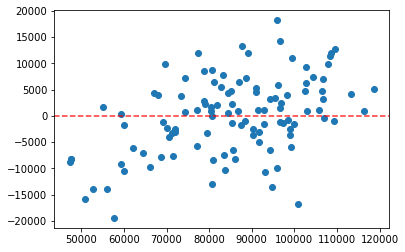

In [62]:
fig, ax = plt.subplots()
y_pred= reg_lin.predict(sm.add_constant(X))
ax.scatter(y, y-y_pred)
plt.axhline(y=0,color='red', alpha=0.8, linestyle='--')


In [63]:
# Aqui comienza la parte de regresion logistica

df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [64]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [65]:
# Cuales son las variables que mas influyen para que una persona gane mas que 96 mil
y = np.where(df['salario']> 96000,1,0) # si se cumple que sea mayor a 96mil este es 1 sino 0
x= df.drop(['salario'],axis=1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

[Text(0, 0.5, 'y'), Text(0.5, 0, 'salario')]

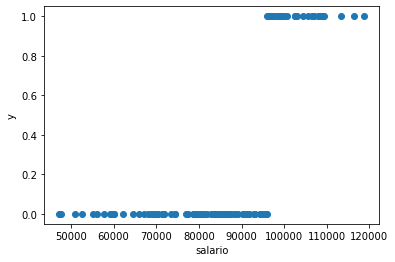

In [66]:
fig, ax = plt.subplots()
ax.scatter(df.salario,y)
ax.set(xlabel='salario',ylabel='y')

In [67]:
# Regresion logistica
reg_log = linear_model.LogisticRegression()
reg_log.fit(X,y)
y_estimado_1 = reg_log.predict_proba(X)[:,1]
y_estimado =reg_log.predict(X)

In [68]:
y_estimado

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [69]:
y == y_estimado

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [70]:
y_estimado_1

array([0.70235862, 0.02574864, 0.35170909, 0.06196423, 0.31809786,
       0.8699411 , 0.0462788 , 0.4219349 , 0.20391496, 0.02465196,
       0.09981091, 0.09132652, 0.00526935, 0.67049021, 0.14891767,
       0.37432327, 0.0579849 , 0.27651759, 0.45157897, 0.00363626,
       0.52000969, 0.43365631, 0.64584505, 0.0128491 , 0.00614024,
       0.02296405, 0.41511954, 0.06647567, 0.01637998, 0.2452415 ,
       0.59583531, 0.6697748 , 0.01969185, 0.53891455, 0.27594976,
       0.73947324, 0.04398781, 0.60663476, 0.42262778, 0.42470826,
       0.31441299, 0.06065663, 0.39023075, 0.41098814, 0.05260305,
       0.79066983, 0.67531681, 0.13399343, 0.09440325, 0.51159684,
       0.914799  , 0.93371611, 0.02405407, 0.04458888, 0.76857832,
       0.50601734, 0.13202831, 0.94921916, 0.01890075, 0.54858215,
       0.01584599, 0.72190523, 0.06772011, 0.07871779, 0.0090867 ,
       0.00345839, 0.52142733, 0.34856797, 0.04804768, 0.02610729,
       0.10895051, 0.4356527 , 0.20207695, 0.85254845, 0.09611